In [518]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# displaying options for data frames
pd.set_option("display.max_columns", 5400)
pd.set_option("display.max_colwidth", 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [519]:
bike_data = pd.read_csv("../data_clean/london_merged_clean.csv", encoding = "ISO-8859-1")
terrorism_data = pd.read_csv("../data_clean/global_terrorism_clean_uk_only.csv" , encoding = 'utf-8') #"ISO-8859-1")

In [520]:
terrorism_data

,Unnamed: 0,event_id,state,city,location,event_summary,multiple_perps(y/n),attack_succeeded(y/n),suicide_attack(y/n),attack_type,target_type,target_subtype,preps_group_name,affiliated(y/n),no_of_perps,people_killed,people_wounded,weapon_type,date
0,0,201501050067,Northern Ireland,Balleymoney,NaN,"01/05/2015: Assailants attacked Brian McIlhagga in Ballymoney city, Ballymoney district, Northern Ireland, United Kingdom. McIlhagga was killed and another person was injured in the attack. No group claimed responsibility; however, sources attributed the incident to loyalists.",False,True,False,Armed Assault,Private Citizens & Property,Named Civilian,Loyalists,True,4.000,1,1,Firearms,2015-01-05
1,1,201501080057,Northern Ireland,Belfast,NaN,"01/08/2015: An explosive device hidden inside a package addressed to Police Service of Northern Ireland (PSNI) Chief Constable George Hamilton was discovered and defused in Knock Road area, Belfast city, Belfast district, Northern Ireland, United Kingdom. No group claimed responsibility for the incident.",False,False,False,Bombing/Explosion,Police,Police Security Forces/Officers,NaN,True,nan,0,0,Explosives,2015-01-08
2,2,201501170069,Northern Ireland,Londonderry,NaN,"01/17/2015: Assailants opened fire on patrons at a bar in Londonderry city, Londonderry district, Northern Ireland, United Kingdom. No casualties were reported. No group claimed responsibility for the incident; however, sources attributed the attack to dissident republicans.",False,True,False,Armed Assault,Business,Restaurant/Bar/Café,Dissident Republicans,True,nan,0,0,Firearms,2015-01-17
3,3,201501200046,Northern Ireland,Belfast,NaN,"01/20/2015: An explosive device was discovered and defused in Belfast city, Belfast district, Northern Ireland, United Kingdom. No group claimed responsibility for the incident.",False,False,False,Bombing/Explosion,NaN,NaN,NaN,True,nan,0,0,Explosives,2015-01-20
4,4,201501300075,Northern Ireland,Belfast,NaN,"01/30/2015: Assailants opened fire on a civilian at a fast food restaurant in Belfast city, Northern Ireland, United Kingdom. The civilian, identified as Harry McMahon, was wounded in the attack. No group claimed responsibility; however, sources attributed the incident to dissident republicans.",False,True,False,Armed Assault,Private Citizens & Property,Named Civilian,Dissident Republicans,True,nan,0,1,Firearms,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,201612150018,Northern Ireland,Armagh,NaN,"12/15/2016: An explosive device detonated in Armagh, Northern Ireland, United Kingdom. There were no reported casualties in the blast. No group claimed responsibility for the incident.",False,True,False,Bombing/Explosion,NaN,NaN,NaN,True,nan,0,0,Explosives,2016-12-15
215,215,201612180024,Northern Ireland,Belfast,The incident occurred in the Aitnamona Crescent area.,"12/18/2016: Assailants shot and injured a civilian in Belfast, Northern Ireland, United Kingdom. No group claimed responsibility for the incident; however, sources suspected that Oglaigh na hEireann may have carried out the attack, which the group denied.",False,True,False,Armed Assault,Private Citizens & Property,Unnamed Civilian/Unspecified,Oglaigh na hEireann,True,nan,0,1,Firearms,2016-12-18
216,216,201612220011,Northern Ireland,Dunmurry,The incident occurred in the Colinbrook Park area.,"12/22/2016: Assailants threw an explosive device at a residence in Dunmurry, Northern Ireland, United Kingdom. There were no reported casualties in the blast. No group claimed responsibility for the incident.",False,True,False,Bombing/Explosion,Private Citizens & Property,House/Apartment/Residence,NaN,True,nan,0,0,Explosives,2016-12-22
217,217,201612220012,Northern Ireland,Coalisland,The incident occurred in the Stewartstown Road area.,"12/21/2016: Assailants threw an explosive device at a house in Coalisland, Northern Ireland, United Kingdom. There were no reported casualties. No group claimed responsibilit

In [521]:
terrorism_data = terrorism_data.drop(["Unnamed: 0"], axis=1)

In [522]:
df = bike_data.merge(terrorism_data, how = 'left', on = 'date')

In [523]:
df.head()

,date,bike_rents,temp_actual(C),temp_feeling(C),humidity,wind_speed,weather_condition,holiday(y/n),weekend(y/n),season,event_id,state,city,location,event_summary,multiple_perps(y/n),attack_succeeded(y/n),suicide_attack(y/n),attack_type,target_type,target_subtype,preps_group_name,affiliated(y/n),no_of_perps,people_killed,people_wounded,weapon_type
0,2015-01-04,9234,2.480,0.650,94.270,7.500,partly cloudy,False,True,winter,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
1,2015-01-05,20372,8.040,6.710,80.310,8.850,partly cloudy,False,False,winter,201501050067.000,Northern Ireland,Balleymoney,NaN,"01/05/2015: Assailants attacked Brian McIlhagga in Ballymoney city, Ballymoney district, Northern Ireland, United Kingdom. McIlhagga was killed and another person was injured in the attack. No group claimed responsibility; however, sources attributed the incident to loyalists.",False,True,False,Armed Assault,Private Citizens & Property,Named Civilian,Loyalists,True,4.000,1.000,1.000,Firearms
2,2015-01-06,20613,7.850,5.330,78.900,16.000,clear,False,False,winter,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
3,2015-01-07,21064,7.460,4.500,78.110,19.760,few clouds,False,False,winter,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
4,2015-01-08,15601,9.750,7.790,79.310,20.480,few clouds,False,False,winter,201501080057.000,Northern Ireland,Belfast,NaN,"01/08/2015: An explosive device hidden inside a package addressed to Police Service of Northern Ireland (PSNI) Chief Constable George Hamilton was discovered and defused in Knock Road area, Belfast city, Belfast district, Northern Ireland, United Kingdom. No group claimed responsibility for the incident.",False,False,False,Bombing/Explosion,Police,Police Security Forces/Officers,NaN,True,nan,0.000,0.000,Explosives


In [524]:
df.dtypes

date                      object
bike_rents                 int64
temp_actual(C)           float64
temp_feeling(C)          float64
humidity                 float64
wind_speed               float64
weather_condition         object
holiday(y/n)                bool
weekend(y/n)                bool
season                    object
event_id                 float64
state                     object
city                      object
location                  object
event_summary             object
multiple_perps(y/n)       object
attack_succeeded(y/n)     object
suicide_attack(y/n)       object
attack_type               object
target_type               object
target_subtype            object
preps_group_name          object
affiliated(y/n)           object
no_of_perps              float64
people_killed            float64
people_wounded           float64
weapon_type               object
dtype: object

In [525]:
df["event_id"]  = df["event_id"].replace(np.nan, 'NAN')

In [526]:
df["event_id"] = np.where(df["event_id"] != "NAN", True, False)

In [527]:
df.rename(columns = {"event_id" : "attack(y/n)"}, inplace = True)

In [528]:
df.dtypes

date                      object
bike_rents                 int64
temp_actual(C)           float64
temp_feeling(C)          float64
humidity                 float64
wind_speed               float64
weather_condition         object
holiday(y/n)                bool
weekend(y/n)                bool
season                    object
attack(y/n)                 bool
state                     object
city                      object
location                  object
event_summary             object
multiple_perps(y/n)       object
attack_succeeded(y/n)     object
suicide_attack(y/n)       object
attack_type               object
target_type               object
target_subtype            object
preps_group_name          object
affiliated(y/n)           object
no_of_perps              float64
people_killed            float64
people_wounded           float64
weapon_type               object
dtype: object

In [529]:
df['date'] = pd.to_datetime(df['date'])

In [530]:
df.dtypes

date                     datetime64[ns]
bike_rents                        int64
temp_actual(C)                  float64
temp_feeling(C)                 float64
humidity                        float64
wind_speed                      float64
weather_condition                object
holiday(y/n)                       bool
weekend(y/n)                       bool
season                           object
attack(y/n)                        bool
state                            object
city                             object
location                         object
event_summary                    object
multiple_perps(y/n)              object
attack_succeeded(y/n)            object
suicide_attack(y/n)              object
attack_type                      object
target_type                      object
target_subtype                   object
preps_group_name                 object
affiliated(y/n)                  object
no_of_perps                     float64
people_killed                   float64


In [531]:
df = df.set_index("date")

In [532]:
df.head()

,bike_rents,temp_actual(C),temp_feeling(C),humidity,wind_speed,weather_condition,holiday(y/n),weekend(y/n),season,attack(y/n),state,city,location,event_summary,multiple_perps(y/n),attack_succeeded(y/n),suicide_attack(y/n),attack_type,target_type,target_subtype,preps_group_name,affiliated(y/n),no_of_perps,people_killed,people_wounded,weapon_type
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04,9234,2.480,0.650,94.270,7.500,partly cloudy,False,True,winter,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
2015-01-05,20372,8.040,6.710,80.310,8.850,partly cloudy,False,False,winter,True,Northern Ireland,Balleymoney,NaN,"01/05/2015: Assailants attacked Brian McIlhagga in Ballymoney city, Ballymoney district, Northern Ireland, United Kingdom. McIlhagga was killed and another person was injured in the attack. No group claimed responsibility; however, sources attributed the incident to loyalists.",False,True,False,Armed Assault,Private Citizens & Property,Named Civilian,Loyalists,True,4.000,1.000,1.000,Firearms
2015-01-06,20613,7.850,5.330,78.900,16.000,clear,False,False,winter,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
2015-01-07,21064,7.460,4.500,78.110,19.760,few clouds,False,False,winter,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN
2015-01-08,15601,9.750,7.790,79.310,20.480,few clouds,False,False,winter,True,Northern Ireland,Belfast,NaN,"01/08/2015: An explosive device hidden inside a package addressed to Police Service of Northern Ireland (PSNI) Chief Constable George Hamilton was discovered and defused in Knock Road area, Belfast city, Belfast district, Northern Ireland, United Kingdom. No group claimed responsibility for the incident.",False,False,False,Bombing/Explosion,Police,Police Security Forces/Officers,NaN,True,nan,0.000,0.000,Explosives


In [533]:
# build a function that pulls only date, rents and the bollina attavk or not attack

In [534]:
df_base = df[[ "bike_rents", 'attack(y/n)']].copy()

In [535]:
df_base

,bike_rents,attack(y/n)
date,,
2015-01-04,9234,False
2015-01-05,20372,True
2015-01-06,20613,False
2015-01-07,21064,False
2015-01-08,15601,True
...,...,...
2016-12-30,11566,True
2016-12-31,11424,False
2017-01-01,6421,False


In [536]:
def get_dates_of_attack_lst(df):
    dates_of_attack = list(df.loc[df["attack(y/n)"] == True].index)
    return list(dict.fromkeys(dates_of_attack))
    

In [537]:
attacklist = get_dates_of_attack_lst(df_base)

## write the following as a function to run all on date

In [538]:
def get_date_index(date, days = 8) -> list:
    date_indexes = []
    week_before = list(pd.date_range(end = date, periods = days))
    week_after = list(pd.date_range(start = date, periods = days))
    for entry in week_before:
        date_indexes.append(entry)
    for entry in week_after:
        date_indexes.append(entry)
    return list(dict.fromkeys(date_indexes))

In [ ]:
def get_rents_counts(df, date_indexes):
    
    dates_of_attack = 

In [542]:
df_base['bike_rents'][date_indexes]

date
2015-04-01    23539
2015-04-02    22682
2015-04-03    11298
2015-04-04    12864
2015-04-05    19369
2015-04-05    19369
2015-04-06    25439
2015-04-07    29441
2015-04-08    30643
2015-04-08    30643
2015-04-09    31520
2015-04-10    32052
2015-04-11    25113
2015-04-12    29204
2015-04-13    28048
2015-04-14    34519
2015-04-15    37470
Name: bike_rents, dtype: int64

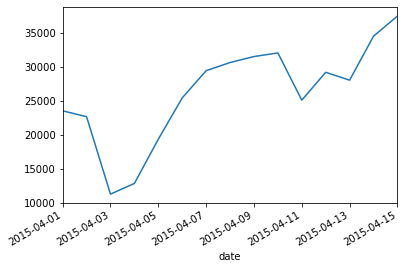

In [543]:
df_base['bike_rents'][date_indexes].plot(); 